# Day 4 Pandas DataFrame Analysis

In [1]:
import pandas as pd

In [2]:
import importlib.metadata

In [3]:
importlib.metadata.version('numpy')

'1.21.5'

In [4]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [82]:
# Look at the date times and the column anames that show the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Company Name                               450 non-null    object        
 1   company contact                            450 non-null    object        
 2   company email                              433 non-null    object        
 3   company phone                              450 non-null    object        
 4   Address                                    450 non-null    object        
 5   City                                       450 non-null    object        
 6   State                                      450 non-null    object        
 7   Postcode                                   450 non-null    int64         
 8   Industry                                   450 non-null    object        
 9   Industry descr       

In [6]:
df.shape

(450, 26)

In [7]:
df.isnull().sum()

Company Name                                   0
company contact                                0
company email                                 17
company phone                                  0
Address                                        0
City                                           0
State                                          0
Postcode                                       0
Industry                                       0
Industry descr                                16
Company Type                                   0
Current fulltime                               4
Job created                                  439
Job retain                                   436
Effective Date                                 0
Total Savings                                  0
Savings from beginning receiving benefits      0
Borough                                        0
Latitude                                      41
Longitude                                     41
Community Board     

In [8]:
Companies = df.groupby("Company Name")["Company Name"].sum()

In [9]:
Companies.shape

(439,)

In [10]:
# Question 1 

# 439 different companies are represented in the data set

# could also double check by converting all to upper or lower case

In [11]:
Jobs = df.groupby('Borough')['Job created'].sum()

In [12]:
Jobs

Borough
Bronx             22.0
Brooklyn          25.0
New York           0.0
Queens           102.0
Staten Island      0.0
Name: Job created, dtype: float64

In [13]:
# Question 2

# 102 jobs were created for businesses in Queens

In [14]:
# Question 3

In [15]:
df1 = df.copy()

df1 = df1 [['Company Name', 'company contact','company email']]

#This method doesnt
df1 = df1.dropna() #have to assign to a dataframe for this to work

#df1['domain'] = df1['company email'].apply(lambda x: x.split('@')[1])

#splits the email at '@' and takes the second part of the split index 1 (first part is index 0)

df1['domain'] = df1['company email'].str.split('@').str[1]


In [17]:
df1.shape

(433, 4)

In [18]:
Domains = df1.groupby('domain')['domain'].nunique()

In [19]:
Domains.shape

(356,)

In [ ]:
# Question 3,there are 356 Unique Domains used

In [ ]:
# Questions Number 4

In [ ]:
# Group by NTAs with at least 5 listed businesses

In [ ]:
# Groups by NTA, and indicates the number of unique Company Names
NTA2 = df.groupby('NTA')['Company Name'].nunique()

# Create bool for indexing 
NTA_over_5 = NTA2[NTA2>5]


In [72]:
#Creae a Month object using datetime

from datetime import datetime

df['date'] = pd.to_datetime(df['Effective Date'], format = '%m/%d/%Y')
df['Month'] = df['date'].dt.month

In [75]:
#Use the AGG method to create 3 columns that will be used for Day 5

# Require the average total savings, so use the function mean, 
# Require the total jobs created, so use the sum function
# Need to plot jobs by month, so use the median - to give a representative 'Month' of the Effective Day that 
# The environmental impacts were created in each businesses, grouped by NTA - we do not know the day each job was created


NTA_agg = df.groupby('NTA').agg({'Total Savings':'mean', 
                                 'Job created':'sum', 
                                 'Month':'median'})

In [77]:
NTA_df = NTA_agg.loc[NTA_over_5.index].reset_index()

In [78]:
NTA_df

,NTA,Total Savings,Job created,Month
0,Battery Park City-Lower Manhattan,469890.796667,0.0,6.0
1,Bushwick South,26140.455000,10.0,7.0
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0,7.0
3,College Point,17159.372857,2.0,6.0
4,Crown Heights North,4036.298889,0.0,7.0
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0,7.0
6,East New York,48433.093333,15.0,7.0
7,East Williamsburg,13990.626364,0.0,6.0
8,Greenpoint,9753.649286,0.0,6.5
9,Hunters Point-Sunnyside-West Maspeth,23931.398933,0.0,6.0


In [ ]:
# Question Number 5

NTA_df.to_csv('TDI_Onboarding_Day4.csv')

# Day 5 Plotting 

In [84]:
import matplotlib.pyplot as plt 

In [86]:
df_day5 = NTA_df

Text(0.5, 1.0, 'Day 5 Scatter Plot')

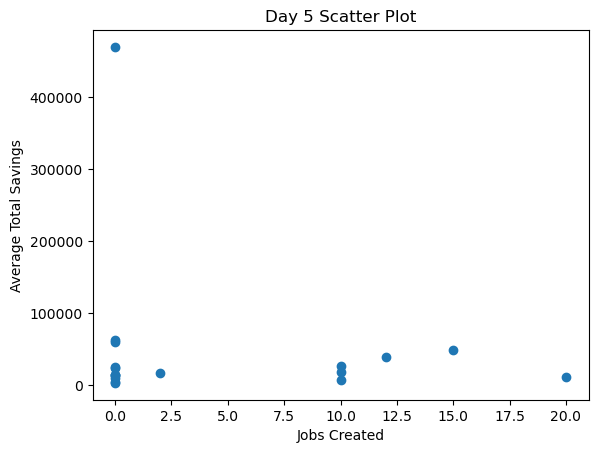

In [87]:
plt.scatter(df_day5['Job created'], df_day5['Total Savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings')
plt.title('Day 5 Scatter Plot')

In [93]:
import numpy as np

Text(0.5, 1.0, 'Day 5 Scatter Plot')

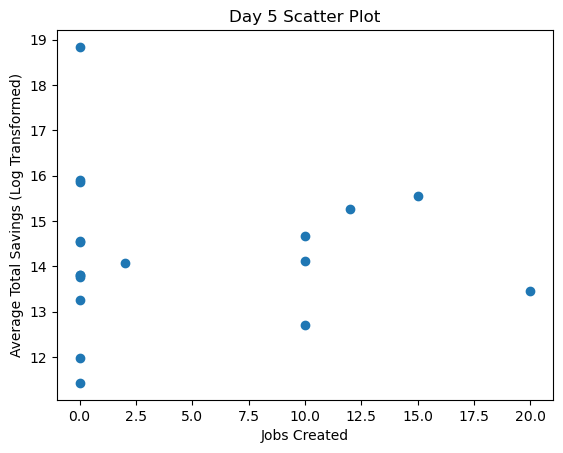

In [92]:
plt.scatter(df_day5['Job created'], np.log2(df_day5['Total Savings']))
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings (Log Transformed)')
plt.title('Day 5 Scatter Plot')

Text(0.5, 1.0, 'Day 5 Histogram')

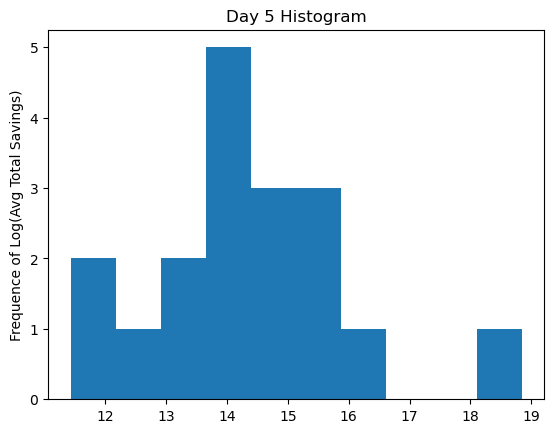

In [96]:
plt.hist(np.log2(df_day5['Total Savings']))
plt.ylabel('Frequence of Log(Avg Total Savings)')
plt.title('Day 5 Histogram')

Text(0.5, 1.0, 'Day 5 Line Plot, Total Jobs vs. Month')

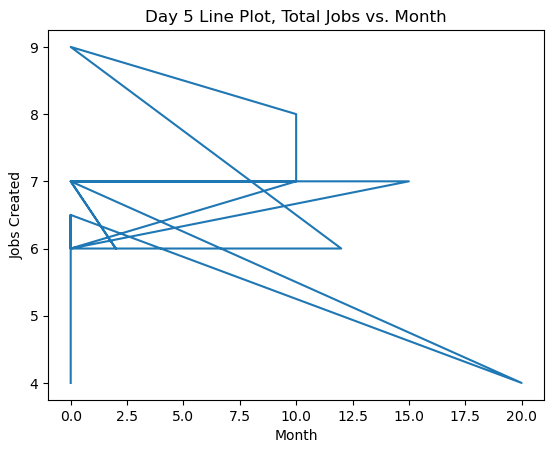

In [100]:
# This plot looks odd, but evidently so. Here we have assumed that Jobs created is related to the 'Effective Date' 
# This is very unlikely, however this is the best estimate.


plt.plot( df_day5['Job created'], df_day5['Month'])
plt.xlabel('Month')
plt.ylabel('Jobs Created')
plt.title('Day 5 Line Plot, Total Jobs vs. Month')